<a href="https://colab.research.google.com/github/meglee67/datasci_6_anova/blob/main/HHA_507_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [2]:
!pip install ucimlrepo

In [3]:
## bringing in data
from ucimlrepo import fetch_ucirepo

##bring in packages for dataframe + stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## for visualization
import matplotlib.pyplot as plt

# 1. Data Preparation

## Variables of Interest
* **Research Question**: How do the race of the patient (race) and
their A1C test results (A1Cresult) jointly influence the duration of
their hospital stay (time_in_hospital)?

* **Independent Variable 1**: Patient Race
  * Caucasian
  * Asian
  * African American
  * Hispanic
  * Other

* **Independent Variable 2**: A1C Test Result
  * More than 8%
  * 7%
  * Normal
  * None (not measure)

* **Dependent Variable**: Duration of Hospital Stay (time_in_hospital)

In [4]:
# Fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [5]:
# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [7]:
# Loading X as a dataframe
df1 = pd.DataFrame(X)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [10]:
# Loading y as a dataframe
df2 = pd.DataFrame(y)
df2

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [11]:
# Create a subset of the data that includes only the variables of interest
subset_data = diabetes_130_us_hospitals_for_years_1999_2008.data.features[["race", "A1Cresult", "time_in_hospital"]]

In [14]:
# Check the data types of columns in the DataFrame
data_types = subset_data.dtypes
print(data_types)

race                object
A1Cresult           object
time_in_hospital     int64
dtype: object


In [13]:
# Ensure appropriate data types
subset_data["race"] = subset_data["race"].astype(str)  # Convert 'race' to string category
subset_data["A1Cresult"] = subset_data["A1Cresult"].astype(str)  # Convert 'A1Cresult' to string category

<ipython-input-13-198498d1d817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["race"] = subset_data["race"].astype(str)  # Convert 'race' to string category
<ipython-input-13-198498d1d817>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["A1Cresult"] = subset_data["A1Cresult"].astype(str)  # Convert 'A1Cresult' to string category


# Assumption Checks

## Checking for Normality using the Shapiro-Wilk test
* **Null Hypothesis (H0)**: The data is normally distributed
* **Alternative Hypothesis (H1)**: The data is not normally distributed

In [23]:
from scipy.stats import shapiro

In [24]:
# Create a subset of the data with the relevant columns
subset_data = subset_data[["race", "A1Cresult", "time_in_hospital"]]

# Define the unique values for 'race' and 'A1Cresult'
race_values = subset_data['race'].unique()
a1c_values = subset_data['A1Cresult'].unique()

# Perform the Shapiro-Wilk Test for each group combination
for race in race_values:
    for a1c in a1c_values:
        group_data = subset_data[(subset_data['race'] == race) & (subset_data['A1Cresult'] == a1c)]

        if not group_data.empty:
            stat, p = shapiro(group_data['time_in_hospital'])

            print(f"Group: Race = {race}, A1C Result = {a1c}")
            print(f"Shapiro-Wilk Statistic: {stat}")
            print(f"P-value: {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Group: Race = Caucasian, A1C Result = None
Shapiro-Wilk Statistic: 0.8826203346252441
P-value: 0.0
Group: Race = Caucasian, A1C Result = >7
Shapiro-Wilk Statistic: 0.9118195176124573
P-value: 1.7925673399754353e-38
Group: Race = Caucasian, A1C Result = >8
Shapiro-Wilk Statistic: 0.9000392556190491
P-value: 0.0
Group: Race = Caucasian, A1C Result = Norm
Shapiro-Wilk Statistic: 0.9111939072608948
P-value: 1.930148504761003e-41
Group: Race = AfricanAmerican, A1C Result = None
Shapiro-Wilk Statistic: 0.8878889083862305
P-value: 0.0
Group: Race = AfricanAmerican, A1C Result = >7
Shapiro-Wilk Statistic: 0.9217042326927185
P-value: 1.8906119489850806e-16
Group: Race = AfricanAmerican, A1C Result = >8
Shapiro-Wilk Statistic: 0.8937473893165588
P-value: 6.7359146155303186e-34
Group: Race = AfricanAmerican, A1C Result = Norm
Shapiro-Wilk Statistic: 0.9083434343338013
P-value: 2.9696700824519264e-25
Group: Race = nan, A1C Result = None
Shapiro-Wilk Statistic: 0.8821863532066345
P-value: 2.4074285

In [30]:
alpha = 0.05  # Set your significance level
if p > alpha:
    print("Null Hypothesis (H0): Data is normally distributed (failed to reject H0)\n")
else:
    print("Alternative Hypothesis (H1): Data is not normally distributed (reject H0)\n")

Alternative Hypothesis (H1): Data is not normally distributed (reject H0)



#### Another way

In [33]:
# groups = df.groupby(['Diabetic Status', 'Weight Status'])

# for (diabetic_status, weight_status), group_df in groups:
   # _, p_value = stats.shapiro(group_df['Blood Glucose'])

   # print(f"Group ({diabetic_status}, {weight_status}):")
    #print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

  # Edited the code above

groups = subset_data.groupby(['race', 'A1Cresult'])

for (race_status, A1C_status), subset_data in groups:
    _, p_value = stats.shapiro(subset_data['time_in_hospital'])

    print(f"Group ({race_status}, {A1C_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


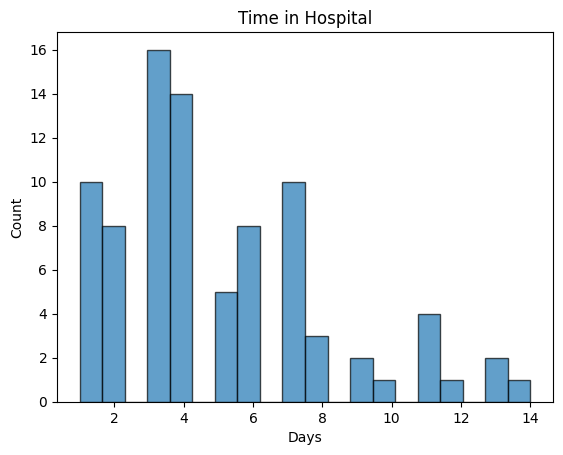

In [34]:
# Visualization: Histogram
plt.hist(subset_data['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Time in Hospital')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### Results
* After testing for the normal distribution of the dependent variable (time_in_hospital) within each group, we accept the alternative hypothesis (H1) and reject the null hypothesis (H0). The data is not normally distributed.

## Checking for Homoscedasticity (Equal Variances)

In [37]:
from scipy.stats import levene

In [35]:
# Define the unique values for 'race' and 'A1Cresult'
race_values = subset_data['race'].unique()
a1c_values = subset_data['A1Cresult'].unique()

In [38]:
# Perform Levene's test for each group combination
for race in race_values:
    for a1c in a1c_values:
        group_data = subset_data[(subset_data['race'] == race) & (subset_data['A1Cresult'] == a1c)]

        if not group_data.empty:
            # Extract the 'time_in_hospital' data for the group
            data_group = group_data['time_in_hospital']

            # Perform Levene's test
            stat, p = levene(*[data_group[data_group.index == i] for i in data_group.index])

            print(f"Group: Race = {race}, A1C Result = {a1c}")
            print(f"Levene's Statistic: {stat}")
            print(f"P-value: {p}")

Group: Race = nan, A1C Result = Norm
Levene's Statistic: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [40]:
alpha = 0.05  # Set your significance level
if p > alpha:
  print("Null Hypothesis (H0): Variances are equal (failed to reject H0)\n")
else:
  print("Alternative Hypothesis (H1): Variances are not equal (reject H0)\n")

Alternative Hypothesis (H1): Variances are not equal (reject H0)



#### Another way

In [42]:
# Levene's Test
statistic, p_value = stats.levene(
    subset_data['time_in_hospital'][subset_data['race'] == 'Caucasian'][subset_data['A1Cresult'] == '>8'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Caucasian'][subset_data['A1Cresult'] == '7'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Caucasian'][subset_data['A1Cresult'] == 'Norm'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Caucasian'][subset_data['A1Cresult'] == 'None'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Asian'][subset_data['A1Cresult'] == '>8'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Asian'][subset_data['A1Cresult'] == '7'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Asian'][subset_data['A1Cresult'] == 'Norm'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Asian'][subset_data['A1Cresult'] == 'None'],
    subset_data['time_in_hospital'][subset_data['race'] == 'AfricanAmerican'][subset_data['A1Cresult'] == '>8'],
    subset_data['time_in_hospital'][subset_data['race'] == 'AfricanAmerican'][subset_data['A1Cresult'] == '7'],
    subset_data['time_in_hospital'][subset_data['race'] == 'AfricanAmerican'][subset_data['A1Cresult'] == 'Norm'],
    subset_data['time_in_hospital'][subset_data['race'] == 'AfricanAmerican'][subset_data['A1Cresult'] == 'None'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Hispanic'][subset_data['A1Cresult'] == '>8'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Hispanic'][subset_data['A1Cresult'] == '7'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Hispanic'][subset_data['A1Cresult'] == 'Norm'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Hispanic'][subset_data['A1Cresult'] == 'None'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Other'][subset_data['A1Cresult'] == '>8'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Other'][subset_data['A1Cresult'] == '7'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Other'][subset_data['A1Cresult'] == 'Norm'],
    subset_data['time_in_hospital'][subset_data['race'] == 'Other'][subset_data['A1Cresult'] == 'None'],
)

print(f"Statistic value: {statistic}")
print(f"Levene's Test P-value: {p_value}")

Statistic value: nan
Levene's Test P-value: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [43]:
alpha = 0.05  # Set your significance level
if p > alpha:
  print("Null Hypothesis (H0): Variances are equal (failed to reject H0)\n")
else:
  print("Alternative Hypothesis (H1): Variances are not equal (reject H0)\n")

Alternative Hypothesis (H1): Variances are not equal (reject H0)



### Results
* After testing for variance, possibly because I didn't clean my data, I ran into some error messages when trying to print the p-value, but I was able to confirm that the variances are not equal by testing the p-value against a set alpha value.
*The warning "Mean of empty slice" suggests that for at least one combination of race and A1Cresult, there might not be enough data points to perform the Levene's test. It could be that there are missing values or too few observations in some categories.